In [1]:
import pandas as pd
import numpy as np

In [2]:
url = r"C:\Users\gonza\OneDrive\Documentos\datascience-thebridge-master\ejercicios gonzalo\DATA\Titanic\titanic.csv"
data = pd.read_csv(url)
data.head(3)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250


In [3]:
dummy_sex = pd.get_dummies(data["Sex"],prefix="sex")
dummy_sex.head(4)

,sex_female,sex_male
0,0,1
1,1,0
2,1,0
3,1,0


In [4]:
column_names = data.columns.values.tolist()
column_names

['Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'Siblings/Spouses Aboard',
 'Parents/Children Aboard',
 'Fare']

In [5]:
data = data.drop(["Sex"],axis=1)

In [27]:
data = pd.concat([data,dummy_sex],axis=1)

In [29]:
data.drop("Name",axis=1,inplace=Trueb)

In [35]:
data["Age"] = (data["Age"] - np.min(data["Age"])) / (np.max(data["Age"])- np.min(data["Age"]))

In [36]:
data["Fare"] =  (data["Fare"] - np.min(data["Fare"])) / (np.max(data["Fare"])- np.min(data["Fare"]))

In [38]:
data.corr().style.background_gradient(cmap='viridis')

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,sex_female,sex_male
Survived,1.000000,-0.336528,-0.059665,-0.037082,0.080097,0.256179,0.542152,-0.542152
Pclass,-0.336528,1.000000,-0.391492,0.085026,0.020252,-0.548919,-0.129507,0.129507
Age,-0.059665,-0.391492,1.000000,-0.297669,-0.193741,0.112329,-0.091875,0.091875
Siblings/Spouses Aboard,-0.037082,0.085026,-0.297669,1.000000,0.414244,0.158839,0.113249,-0.113249
Parents/Children Aboard,0.080097,0.020252,-0.193741,0.414244,1.000000,0.215470,0.244337,-0.244337
Fare,0.256179,-0.548919,0.112329,0.158839,0.215470,1.000000,0.181137,-0.181137
sex_female,0.542152,-0.129507,-0.091875,0.113249,0.244337,0.181137,1.000000,-1.000000
sex_male,-0.542152,0.129507,0.091875,-0.113249,-0.244337,-0.181137,-1.000000,1.000000


In [39]:
X = data.drop("Survived",axis=1).copy()
Y = data["Survived"]

In [40]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression

In [43]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [44]:
model = LogisticRegression(class_weight="balanced")
model.fit(X_train,Y_train)

LogisticRegression(class_weight='balanced')

In [45]:
pred = model.predict(X_train)

In [46]:
model.score(X_train,Y_train)

0.7935483870967742

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       383
           1       0.72      0.76      0.74       237

    accuracy                           0.79       620
   macro avg       0.78      0.79      0.78       620
weighted avg       0.80      0.79      0.79       620



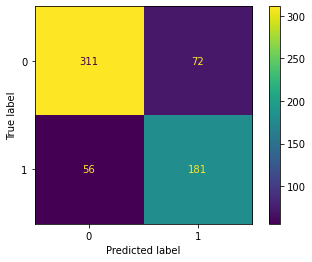

In [47]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_train,Y_train)
print(classification_report(Y_train,pred))

In [48]:
### usamos gridsearch
#Grid Search
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')
grid_clf_acc.fit(X_train, Y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       162
           1       0.77      0.70      0.73       105

    accuracy                           0.80       267
   macro avg       0.79      0.78      0.78       267
weighted avg       0.80      0.80      0.80       267



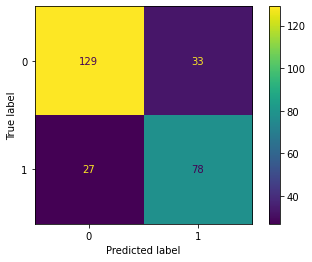

In [49]:
plot_confusion_matrix(model,X_test,Y_test)
print(classification_report(Y_test,y_pred_acc))

## Plots y visualizacion

In [7]:
url = r"C:\Users\gonza\OneDrive\Documentos\datascience-thebridge-master\ejercicios gonzalo\DATA\telecom_churn.csv"
data1 = pd.read_csv(url)
data1.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
data1.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

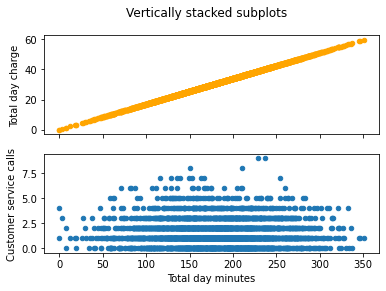

In [10]:
fig, axs = plt.subplots(2,1, sharex=True)
fig.suptitle('Vertically stacked subplots')
data1.plot(kind="scatter",x="Total day minutes",y='Total day charge',color="orange",ax=axs[0])
data1.plot(kind="scatter",x="Total day minutes",y='Customer service calls',ax=axs[1])

plt.show()

### Histograma de frecuencia

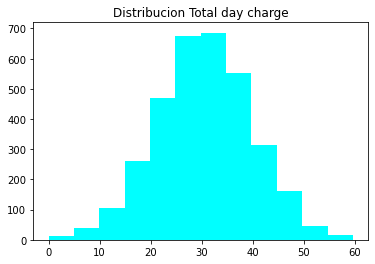

In [11]:
bins =int(1 + np.log2(len(data1["Total day charge"])))
plt.hist(data1["Total day charge"], bins=bins, color="cyan")
plt.title("Distribucion Total day charge")
plt.show()

### Data wrangling

In [12]:
## el metodo simulacion de monte carlo


In [13]:
data1.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


In [14]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [15]:
data1.drop(columns=["State","Area code"], axis=1, inplace=True)

In [16]:
data1.columns

Index(['Account length', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls', 'Churn'],
      dtype='object')

### cambiando variables categoricas
usamos por ejemplo replace y categoricas

cleanup_nums = {"num_doors":     {"four": 4, "two": 2},
                "num_cylinders": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }}

obj_df.replace(cleanup_nums, inplace=True)
obj_df.head()

In [17]:
data1.head(3)

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


In [18]:
data1["Churn"] = data1["Churn"].astype("category")

In [19]:
data1["Churn"] = data1["Churn"].cat.codes

In [20]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


%matplotlib inline


In [21]:
### regresion lineal
url2 = "https://raw.githubusercontent.com/joanby/python-ml-course/master/datasets/ads/Advertising.csv"
data_ads = pd.read_csv(url2)
data_ads.head(3)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


In [22]:
data_ads["Sales"] = data_ads["Sales"] * 100

In [23]:
# preparamos los datos para el modelo
train, test = train_test_split(data_ads)
X_train = train.drop(columns=["Sales"])
y_train = train["Sales"]
X_test = test.drop(columns=["Sales"])
y_test = test["Sales"]

## Train the model and test it¶
First of all we are going to see the hyperparameters that Linear regressiona have

* fit_intercept: True or False if you want a constant $\beta$
* normalize: if you want to normalize the data before train

In [24]:
from sklearn.linear_model import LinearRegression
# instanciamos el modelo
lm = LinearRegression(fit_intercept=True, normalize=True)
# entrenamos
lm.fit(X_train,y_train)
predictions_train = lm.predict(X_train)
predictions_test = lm.predict(X_test)


In [25]:
# realizamos la metrica para comprobar que bueno es nuestro modelo
print("Mean absolute error in train: ", mean_absolute_error(predictions_train, y_train))
print("Root of mean square error in train: ", np.sqrt(mean_squared_error(predictions_train, y_train)))
print("Mean absolute error in test: ", mean_absolute_error(predictions_test, y_test))
print("Root of mean square error in test: ", np.sqrt(mean_squared_error(predictions_test, y_test)))
print("R2 in train: ", r2_score(predictions_train, y_train))
print("R2 in test: ", r2_score(predictions_test, y_test))
print("Min sales: ", np.min(data_ads['Sales']))
print("Max sales: ", np.max(data_ads['Sales']))

Mean absolute error in train:  126.81493524141557
Root of mean square error in train:  171.21590821723382
Mean absolute error in test:  126.0230178885865
Root of mean square error in test:  153.72714029182947
R2 in train:  0.8834272693836114
R2 in test:  0.897445343449552
Min sales:  160.0
Max sales:  2700.0



* We have a mean absolute error of 135 € per store in test, wich is not good but we can work with him.
* Our root mean squared error is higher which means that some data suffers a big error
* Our R2 says that we can explain the 87% of the sells with this model and this variables, i don't like to much this metric, and is   * not very recommendable to use it

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002658C90FD60>,
      dtype=object)

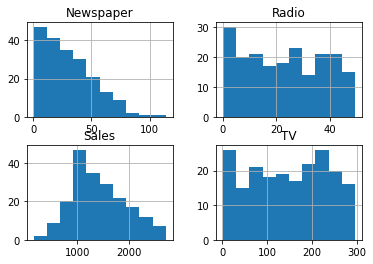

In [26]:
data_ads.hist()